In [34]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max.columns', None)

## read data_lyrics

In [35]:
data = pd.read_csv('dbqprofjinjin.csv',index_col=0)

C:\Users\jinji\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (2,3,4,18,19,22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [37]:
data.shape

(93627, 58)

In [38]:
data.head()

,id,song,album,artist,acousticness_x,danceability_x,duration_ms_x,energy_x,instrumentalness_x,key_x,liveness_x,loudness_x,mode_x,speechiness_x,tempo_x,time_signature,valence_x,album_id,date,date_year,duration_ms_d,com_f_x,acousticness_y,artists,danceability_y,duration_ms_y,energy_y,explicit,instrumentalness_y,key_y,liveness_y,loudness_y,mode_y,name,popularity,release_date,speechiness_y,tempo_y,valence_y,year,release_date_year,artists_d,com_f_y,popularity_dummy,lyrics,stats_dict_tuple,num_sentences,num_words,num_syllables,readability,grade,richness,Language,neg,neu,pos,compound,compound_vader_polarity
0,1WsU2DCFFNbYgJU17zpLIe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.711,['Lefty Frizzell'],0.794,155693,0.216,0,0.000000,2,0.313,-13.160,1,"Moonlight, Darling and You",0,1953,0.0317,110.370,0.580,1953,1953,Lefty Frizzell,"Lefty Frizzell155693Moonlight, Darling and You...",0,scene .— a great terrace in the palace of hero...,"({'num_sentences': 1366, 'num_words': 14936, '...",1366.0,14936.0,14780.0,112.020,5th Grade,0.050911,en,0.100,0.782,0.118,0.9997,1.0
1,1ZhSKUZoemAh7uzuYoWIwr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.497,['Unspecified'],0.310,175413,0.764,0,0.000958,7,0.280,-10.685,1,Bach: Great Prelude in G Major,0,1953-01-01,0.0307,179.617,0.884,1953,1953,Unspecified,Unspecified175413Bach: Great Prelude in G Majo...,0,investigation of the ferguson police departmen...,"({'num_sentences': 2539, 'num_words': 67800, '...",2539.0,67800.0,99017.0,56.179,11th Grade,0.032793,en,0.125,0.802,0.073,-1.0000,-1.0
2,1Vzfi6QyWfVDtsYSaO6Imi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.914,['Yves Montand'],0.380,189920,0.465,0,0.000009,5,0.111,-10.560,1,La grande cité,0,1953,0.0420,95.418,0.438,1953,1953,Yves Montand,Yves Montand189920La grande cité0.9140.380.465...,0,comme là on est où est on est on là . de tomti...,"({'num_sentences': 1207, 'num_words': 20099, '...",1207.0,20099.0,22887.0,93.598,5th Grade,0.295763,fr,0.019,0.970,0.011,-0.9968,-1.0
3,1gc3NBlpqD1mvoC0T3SOe7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.714,['George Lewis'],0.489,161623,0.510,0,0.000043,5,0.118,-8.527,1,Down by the Riverside,0,1953-04-20,0.0382,98.646,0.883,1953,1953,George Lewis,George Lewis161623Down by the Riverside0.71400...,0,the whitechapel murder . during yesterday seve...,"({'num_sentences': 251, 'num_words': 5347, 'nu...",251.0,5347.0,6275.0,85.930,6th Grade,0.126810,en,0.083,0.869,0.048,-0.9996,-1.0
4,1dCOTwNlRg2HLJKJuWj8nN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.970,['Yves Montand'],0.435,274907,0.109,0,0.000000,2,0.421,-16.072,0,Le roi renaud de guerre revient,0,1953,0.0598,88.224,0.351,1953,1953,Yves Montand,Yves Montand274907Le roi renaud de guerre revi...,0,le roi renaud de guerre revient portant ses tr...,"({'num_sentences': 11, 'num_words': 330, 'num_...",11.0,330.0,341.0,88.965,6th Grade,0.240741,fr,0.000,0.979,0.021,0.7293,1.0


In [39]:
data_artist = pd.DataFrame(data[['id', 'artists_d','popularity']])
data_artist = data_artist.rename(columns={'popularity':'spotify_pop'})
data_artist

,id,artists_d,spotify_pop
0,1WsU2DCFFNbYgJU17zpLIe,Lefty Frizzell,0
1,1ZhSKUZoemAh7uzuYoWIwr,Unspecified,0
2,1Vzfi6QyWfVDtsYSaO6Imi,Yves Montand,0
3,1gc3NBlpqD1mvoC0T3SOe7,George Lewis,0
4,1dCOTwNlRg2HLJKJuWj8nN,Yves Montand,0
...,...,...,...
93622,6h4Yp7LPev3PNZvMrFCzC0,Sergio Mendes & Brasil '66,25
93623,6h5w4ez470ZaXq6sD2FozJ,Survivor,34
93624,6h77X5H4dP9l2jzG92vVv0,"""Weird Al"" Yankovic",35
93625,6h8laPks98zPizQ5qahy40,Bob Dylan,39


## read artist_followers

In [40]:
artist = pd.read_csv('artist_followers_popularity (spotify).csv', index_col=0)

In [41]:
artist.shape

(31177, 5)

In [42]:
artist.reset_index(inplace=True, drop=True)
artist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31177 entries, 0 to 31176
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   artist_id    31177 non-null  object 
 1   artist_name  31176 non-null  object 
 2   followers    31177 non-null  float64
 3   genres       31177 non-null  object 
 4   popularity   31177 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.2+ MB


In [43]:
artist = artist.rename(columns={'popularity':'artist_popularity'})

### drop null values

In [44]:
artist[artist.artist_name.isnull()]

,artist_id,artist_name,followers,genres,artist_popularity
6415,4oPYazJJ1o4rWBrTw9lm40,NaN,2834.0,[],50.0


In [45]:
artist.drop(labels=6415, axis=0, inplace=True)
artist.shape

(31176, 5)

In [46]:
artist.artist_name.isnull().any()

False

### drop duplicates, only keep the highest popularity

In [47]:
artist.artist_name.nunique()

31175

In [48]:
artist[artist.artist_name.duplicated(keep=False)]

,artist_id,artist_name,followers,genres,artist_popularity
15356,4yNluGAiPbYXLwlA9KspbG,The Red Army Choir,90049.0,['russian folk'],57.0
29856,7lUh5w2odGeIGvlkn7ZMPF,The Red Army Choir,8922.0,['russian folk'],48.0


In [49]:
artist.drop(labels=29856, axis=0, inplace=True)
artist.shape

(31175, 5)

In [50]:
artist[artist.artist_name.duplicated(keep=False)]

,artist_id,artist_name,followers,genres,artist_popularity


In [51]:
artist.reset_index(inplace=True, drop=True)
artist.sort_values(by=['artist_popularity'], ascending=False, inplace=True)

## lower case

In [52]:
data_artist['artists_d_low'] = data_artist.artists_d.str.lower()
data_artist

,id,artists_d,spotify_pop,artists_d_low
0,1WsU2DCFFNbYgJU17zpLIe,Lefty Frizzell,0,lefty frizzell
1,1ZhSKUZoemAh7uzuYoWIwr,Unspecified,0,unspecified
2,1Vzfi6QyWfVDtsYSaO6Imi,Yves Montand,0,yves montand
3,1gc3NBlpqD1mvoC0T3SOe7,George Lewis,0,george lewis
4,1dCOTwNlRg2HLJKJuWj8nN,Yves Montand,0,yves montand
...,...,...,...,...
93622,6h4Yp7LPev3PNZvMrFCzC0,Sergio Mendes & Brasil '66,25,sergio mendes & brasil '66
93623,6h5w4ez470ZaXq6sD2FozJ,Survivor,34,survivor
93624,6h77X5H4dP9l2jzG92vVv0,"""Weird Al"" Yankovic",35,"""weird al"" yankovic"
93625,6h8laPks98zPizQ5qahy40,Bob Dylan,39,bob dylan


In [53]:
artist['artist_name_low'] = artist.artist_name.str.lower()
artist

,artist_id,artist_name,followers,genres,artist_popularity,artist_name_low
5929,4q3ewBCX7sLwd24euuV69X,Bad Bunny,29685232.0,"['latin', 'reggaeton', 'trap latino']",100.0,bad bunny
5908,4MCBfE4596Uoi2O4DtmEMz,Juice WRLD,15591062.0,"['chicago rap', 'melodic rap']",98.0,juice wrld
184,3TVXtAsR1Inumwj472S9r4,Drake,52649580.0,"['canadian hip hop', 'canadian pop', 'hip hop'...",98.0,drake
6016,3Nrfpe0tUJi4K4DXYWgMUX,BTS,28708871.0,"['k-pop', 'k-pop boy group']",97.0,bts
3409,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,57465814.0,"['dance pop', 'pop', 'post-teen pop']",97.0,ariana grande
...,...,...,...,...,...,...
27941,6QGfxgVuzV5OwuI8Z8YSey,"Hot Yoga Music Consort, Best of Hits",44.0,[],0.0,"hot yoga music consort, best of hits"
15148,2xuNzrVM6yjLYcTrwxNUpq,Terrorgod,17.0,[],0.0,terrorgod
6331,5ZiGLUTyhLNMxmDRXiDEPv,Edouart Delmont,0.0,[],0.0,edouart delmont
15150,01wB2ChcD7bZLsuN0dDLDt,Neaality Gandhi,8.0,[],0.0,neaality gandhi


## pick the first artist in Spotify

In [54]:
import re

def match_name(s):
    pattern = re.compile(r'^(.+?)'+'\',', flags=re.IGNORECASE)
    if pattern.match(s):
        return pattern.match(s).group()[:-2]
    else:
        return s

In [55]:
data_artist['artist_fir'] = data_artist.artists_d_low.apply(match_name)
data_artist

,id,artists_d,spotify_pop,artists_d_low,artist_fir
0,1WsU2DCFFNbYgJU17zpLIe,Lefty Frizzell,0,lefty frizzell,lefty frizzell
1,1ZhSKUZoemAh7uzuYoWIwr,Unspecified,0,unspecified,unspecified
2,1Vzfi6QyWfVDtsYSaO6Imi,Yves Montand,0,yves montand,yves montand
3,1gc3NBlpqD1mvoC0T3SOe7,George Lewis,0,george lewis,george lewis
4,1dCOTwNlRg2HLJKJuWj8nN,Yves Montand,0,yves montand,yves montand
...,...,...,...,...,...
93622,6h4Yp7LPev3PNZvMrFCzC0,Sergio Mendes & Brasil '66,25,sergio mendes & brasil '66,sergio mendes & brasil '66
93623,6h5w4ez470ZaXq6sD2FozJ,Survivor,34,survivor,survivor
93624,6h77X5H4dP9l2jzG92vVv0,"""Weird Al"" Yankovic",35,"""weird al"" yankovic","""weird al"" yankovic"
93625,6h8laPks98zPizQ5qahy40,Bob Dylan,39,bob dylan,bob dylan


## left join

In [56]:
artist_left = data_artist.merge(artist, how='left', left_on=['artist_fir'], right_on=['artist_name_low'])
artist_left

,id,artists_d,spotify_pop,artists_d_low,artist_fir,artist_id,artist_name,followers,genres,artist_popularity,artist_name_low
0,1WsU2DCFFNbYgJU17zpLIe,Lefty Frizzell,0,lefty frizzell,lefty frizzell,05pAwLhsutiuj6gerEwGvU,Lefty Frizzell,68967.0,"['arkansas country', 'country rock', 'honky to...",45.0,lefty frizzell
1,1ZhSKUZoemAh7uzuYoWIwr,Unspecified,0,unspecified,unspecified,1DAxGq6wVo10yU3vjZV9kM,Unspecified,1940.0,[],30.0,unspecified
2,1Vzfi6QyWfVDtsYSaO6Imi,Yves Montand,0,yves montand,yves montand,5ru2x3pjrNn67D22BRwlFP,Yves Montand,101639.0,['chanson'],53.0,yves montand
3,1gc3NBlpqD1mvoC0T3SOe7,George Lewis,0,george lewis,george lewis,7mleIOAroBQWqO7SNrAUlt,George Lewis,1921.0,"['dixieland', 'jazz clarinet', 'new orleans ja...",29.0,george lewis
4,1dCOTwNlRg2HLJKJuWj8nN,Yves Montand,0,yves montand,yves montand,5ru2x3pjrNn67D22BRwlFP,Yves Montand,101639.0,['chanson'],53.0,yves montand
...,...,...,...,...,...,...,...,...,...,...,...
93622,6h4Yp7LPev3PNZvMrFCzC0,Sergio Mendes & Brasil '66,25,sergio mendes & brasil '66,sergio mendes & brasil '66,6hCsqVHnBo1BVQWuIjRMkL,Sergio Mendes & Brasil '66,59551.0,['bossa nova'],56.0,sergio mendes & brasil '66
93623,6h5w4ez470ZaXq6sD2FozJ,Survivor,34,survivor,survivor,26bcq2nyj5GB7uRr558iQg,Survivor,676652.0,"['album rock', 'hard rock', 'rock', 'soft rock']",72.0,survivor
93624,6h77X5H4dP9l2jzG92vVv0,"""Weird Al"" Yankovic",35,"""weird al"" yankovic","""weird al"" yankovic",1bDWGdIC2hardyt55nlQgG,"""Weird Al"" Yankovic",537705.0,"['comedy rock', 'comic', 'parody']",61.0,"""weird al"" yankovic"
93625,6h8laPks98zPizQ5qahy40,Bob Dylan,39,bob dylan,bob dylan,74ASZWbe4lXaubB36ztrGX,Bob Dylan,4828689.0,"['album rock', 'classic rock', 'country rock',...",78.0,bob dylan


In [57]:
total_na = artist_left.isnull().sum()
percent_na = (artist_left.isnull().sum()/artist_left.isnull().count())
missing_data = pd.concat([total_na, percent_na], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data['Total']!=0]

,Total,Percent
artist_id,3172,0.033879
artist_name,3172,0.033879
followers,3172,0.033879
genres,3172,0.033879
artist_popularity,3172,0.033879
artist_name_low,3172,0.033879


In [58]:
null_left = artist_left[artist_left['artist_id'].isnull()].sort_values(by=['spotify_pop'], ascending=False)
null_left.head(50)

,id,artists_d,spotify_pop,artists_d_low,artist_fir,artist_id,artist_name,followers,genres,artist_popularity,artist_name_low
11868,6h5PAsRni4IRlxWr6uDPTP,Axwell /\\ Ingrosso,79,axwell /\\ ingrosso,axwell /\\ ingrosso,NaN,NaN,NaN,NaN,NaN,NaN
11969,39EXZNMxb4RBHlRjnRaOKp,V,78,v,v,NaN,NaN,NaN,NaN,NaN,NaN
12484,7kRKlFCFLAUwt43HWtauhX,"ALI', 'AKLO",75,"ali', 'aklo",ali,NaN,NaN,NaN,NaN,NaN,NaN
57300,1kCewNSs909Xj1naXr36X8,Selena,73,selena,selena,NaN,NaN,NaN,NaN,NaN,NaN
13180,5tsI3xxDHDgzHhn30LTQNz,mike.,72,mike.,mike.,NaN,NaN,NaN,NaN,NaN,NaN
13507,3u5N55tHf7hXATSQrjBh2q,Gala,71,gala,gala,NaN,NaN,NaN,NaN,NaN,NaN
38638,33iv3wnGMrrDugd7GBso1z,Lit,71,lit,lit,NaN,NaN,NaN,NaN,NaN,NaN
57412,1lh3TnDpfNBNfLfOWghNnp,Selena,70,selena,selena,NaN,NaN,NaN,NaN,NaN,NaN
54730,15MJ5NThPjj6xhPcts8MiY,Berlin,70,berlin,berlin,NaN,NaN,NaN,NaN,NaN,NaN
52543,0YAQnYt2oB8OdoaeqnHyTI,"Bas', 'J. Cole",70,"bas', 'j. cole",bas,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
artist_col = ['artist_id', 'artist_name', 'followers', 'genres', 'artist_popularity', 'artist_name_low']

In [60]:
null_left.shape

(3172, 11)

## deal with null

In [61]:
null_process = null_left.iloc[:,:5]
null_process

,id,artists_d,spotify_pop,artists_d_low,artist_fir
11868,6h5PAsRni4IRlxWr6uDPTP,Axwell /\\ Ingrosso,79,axwell /\\ ingrosso,axwell /\\ ingrosso
11969,39EXZNMxb4RBHlRjnRaOKp,V,78,v,v
12484,7kRKlFCFLAUwt43HWtauhX,"ALI', 'AKLO",75,"ali', 'aklo",ali
57300,1kCewNSs909Xj1naXr36X8,Selena,73,selena,selena
13180,5tsI3xxDHDgzHhn30LTQNz,mike.,72,mike.,mike.
...,...,...,...,...,...
5025,2vfSMywX7u3tftkovpUhWR,Foxy,0,foxy,foxy
5036,6fzh5vZp2NSJ0QFIQ5VoN4,Smoke Ring,0,smoke ring,smoke ring
5038,1TXgmeX3yAbkZtTrxZ9qXW,Smoke Ring,0,smoke ring,smoke ring
5042,176zlW24gfGNSqnT3mwILD,Smoke Ring,0,smoke ring,smoke ring


In [62]:
import re

def match_name_str(s):
    pattern = re.compile(r'^[a-zA-Z0-9 ]+', flags=re.IGNORECASE)
    if pattern.match(s):
        clean = pattern.match(s).group()
        if len(clean)>3:
            return clean
        else:
            return s
    else:
        return s

In [63]:
null_process['artist_fir_clean'] = null_process.artist_fir.apply(match_name_str)
null_process

,id,artists_d,spotify_pop,artists_d_low,artist_fir,artist_fir_clean
11868,6h5PAsRni4IRlxWr6uDPTP,Axwell /\\ Ingrosso,79,axwell /\\ ingrosso,axwell /\\ ingrosso,axwell
11969,39EXZNMxb4RBHlRjnRaOKp,V,78,v,v,v
12484,7kRKlFCFLAUwt43HWtauhX,"ALI', 'AKLO",75,"ali', 'aklo",ali,ali
57300,1kCewNSs909Xj1naXr36X8,Selena,73,selena,selena,selena
13180,5tsI3xxDHDgzHhn30LTQNz,mike.,72,mike.,mike.,mike
...,...,...,...,...,...,...
5025,2vfSMywX7u3tftkovpUhWR,Foxy,0,foxy,foxy,foxy
5036,6fzh5vZp2NSJ0QFIQ5VoN4,Smoke Ring,0,smoke ring,smoke ring,smoke ring
5038,1TXgmeX3yAbkZtTrxZ9qXW,Smoke Ring,0,smoke ring,smoke ring,smoke ring
5042,176zlW24gfGNSqnT3mwILD,Smoke Ring,0,smoke ring,smoke ring,smoke ring


In [64]:
artist_clean = artist
artist_clean['name_fir_clean'] = artist_clean.artist_name_low.apply(match_name_str)
artist_clean

,artist_id,artist_name,followers,genres,artist_popularity,artist_name_low,name_fir_clean
5929,4q3ewBCX7sLwd24euuV69X,Bad Bunny,29685232.0,"['latin', 'reggaeton', 'trap latino']",100.0,bad bunny,bad bunny
5908,4MCBfE4596Uoi2O4DtmEMz,Juice WRLD,15591062.0,"['chicago rap', 'melodic rap']",98.0,juice wrld,juice wrld
184,3TVXtAsR1Inumwj472S9r4,Drake,52649580.0,"['canadian hip hop', 'canadian pop', 'hip hop'...",98.0,drake,drake
6016,3Nrfpe0tUJi4K4DXYWgMUX,BTS,28708871.0,"['k-pop', 'k-pop boy group']",97.0,bts,bts
3409,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,57465814.0,"['dance pop', 'pop', 'post-teen pop']",97.0,ariana grande,ariana grande
...,...,...,...,...,...,...,...
27941,6QGfxgVuzV5OwuI8Z8YSey,"Hot Yoga Music Consort, Best of Hits",44.0,[],0.0,"hot yoga music consort, best of hits",hot yoga music consort
15148,2xuNzrVM6yjLYcTrwxNUpq,Terrorgod,17.0,[],0.0,terrorgod,terrorgod
6331,5ZiGLUTyhLNMxmDRXiDEPv,Edouart Delmont,0.0,[],0.0,edouart delmont,edouart delmont
15150,01wB2ChcD7bZLsuN0dDLDt,Neaality Gandhi,8.0,[],0.0,neaality gandhi,neaality gandhi


In [65]:
null_pro_left = null_process.merge(artist_clean, how='left', left_on=['artist_fir_clean'], right_on=['name_fir_clean'])
null_pro_left

,id,artists_d,spotify_pop,artists_d_low,artist_fir,artist_fir_clean,artist_id,artist_name,followers,genres,artist_popularity,artist_name_low,name_fir_clean
0,6h5PAsRni4IRlxWr6uDPTP,Axwell /\\ Ingrosso,79,axwell /\\ ingrosso,axwell /\\ ingrosso,axwell,2XnBwblw31dfGnspMIwgWz,Axwell /\ Ingrosso,2251184.0,"['dance pop', 'edm', 'electro house', 'pop', '...",71.0,axwell /\ ingrosso,axwell
1,39EXZNMxb4RBHlRjnRaOKp,V,78,v,v,v,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7kRKlFCFLAUwt43HWtauhX,"ALI', 'AKLO",75,"ali', 'aklo",ali,ali,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1kCewNSs909Xj1naXr36X8,Selena,73,selena,selena,selena,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5tsI3xxDHDgzHhn30LTQNz,mike.,72,mike.,mike.,mike,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3167,2vfSMywX7u3tftkovpUhWR,Foxy,0,foxy,foxy,foxy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3168,6fzh5vZp2NSJ0QFIQ5VoN4,Smoke Ring,0,smoke ring,smoke ring,smoke ring,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3169,1TXgmeX3yAbkZtTrxZ9qXW,Smoke Ring,0,smoke ring,smoke ring,smoke ring,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3170,176zlW24gfGNSqnT3mwILD,Smoke Ring,0,smoke ring,smoke ring,smoke ring,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
not_null_left = null_pro_left[null_pro_left.artist_id.notnull()]
not_null_left.shape

(199, 13)

In [68]:
artist_left_add = pd.concat([not_null_left, artist_left], axis=0)
artist_left_add.shape

(93826, 13)

In [69]:
artist_left_add = artist_left_add.drop_duplicates(subset=['id'])
artist_left_add.shape

(93627, 13)

In [70]:
total_na = artist_left_add.isnull().sum()
percent_na = (artist_left_add.isnull().sum()/artist_left_add.isnull().count())
missing_data = pd.concat([total_na, percent_na], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data['Total']!=0]

,Total,Percent
artist_fir_clean,93428,0.997875
artist_id,2973,0.031754
artist_name,2973,0.031754
followers,2973,0.031754
genres,2973,0.031754
artist_popularity,2973,0.031754
artist_name_low,2973,0.031754
name_fir_clean,93428,0.997875


In [71]:
artist_left_add['artist_popularity'] = artist_left_add['artist_popularity'].fillna(value = artist_left_add.artist_popularity.mean())

In [72]:
artist_left_add.artist_popularity.isnull().any()

False

In [73]:
col=['id', 'spotify_pop', 'artist_popularity']
artist_final = artist_left_add[col]
artist_final.head()

,id,spotify_pop,artist_popularity
0,6h5PAsRni4IRlxWr6uDPTP,79,71.0
11,5PntSbMHC1ud6Vvl8x56qd,70,31.0
42,6YH2r9NyEJTjlRmKOCvxgJ,65,64.0
48,5NTZM8YYeKM2YsGSffVIge,65,31.0
60,4FTOpNYcGxnQdGNWSxIcio,64,76.0


In [74]:
artist_final.shape

(93627, 3)

In [75]:
artist_final.isnull().any()

id                   False
spotify_pop          False
artist_popularity    False
dtype: bool

In [77]:
df = pd.read_csv('dbqprofjinjin.csv', index_col=0)

C:\Users\jinji\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (2,3,4,18,19,22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [78]:
df.shape

(93627, 58)

In [79]:
df_full = df.merge(artist_final, how='left', left_on=['id'], right_on=['id'])

In [80]:
df_full.shape

(93627, 60)

In [81]:
df_full[df_full.popularity != df_full.spotify_pop]

,id,song,album,artist,acousticness_x,danceability_x,duration_ms_x,energy_x,instrumentalness_x,key_x,liveness_x,loudness_x,mode_x,speechiness_x,tempo_x,time_signature,valence_x,album_id,date,date_year,duration_ms_d,com_f_x,acousticness_y,artists,danceability_y,duration_ms_y,energy_y,explicit,instrumentalness_y,key_y,liveness_y,loudness_y,mode_y,name,popularity,release_date,speechiness_y,tempo_y,valence_y,year,release_date_year,artists_d,com_f_y,popularity_dummy,lyrics,stats_dict_tuple,num_sentences,num_words,num_syllables,readability,grade,richness,Language,neg,neu,pos,compound,compound_vader_polarity,spotify_pop,artist_popularity


In [82]:
df_full.drop(['spotify_pop'], axis=1, inplace=True)
df_full.shape

(93627, 59)

In [83]:
total_na = df_full.isnull().sum()
percent_na = (df_full.isnull().sum()/df_full.isnull().count())
missing_data = pd.concat([total_na, percent_na], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data['Total']!=0]

,Total,Percent
song,62982,0.672691
album,62982,0.672691
artist,62982,0.672691
acousticness_x,62982,0.672691
danceability_x,62982,0.672691
duration_ms_x,62982,0.672691
energy_x,62982,0.672691
instrumentalness_x,62982,0.672691
key_x,62982,0.672691
liveness_x,62982,0.672691


In [84]:
col_feature = [ 'num_sentences', 'num_words', 'num_syllables', 'readability', 'richness',
               'neg', 'neu', 'pos', 'compound', 'compound_vader_polarity',
               'artist_popularity']

In [85]:
df_full[col_feature].describe()

,num_sentences,num_words,num_syllables,readability,richness,neg,neu,pos,compound,compound_vader_polarity,artist_popularity
count,93627.000000,93627.000000,93627.000000,93627.000000,93432.000000,93627.000000,93627.000000,93627.000000,93627.000000,93627.000000,93627.000000
mean,219.460060,5226.599923,6055.529206,-33.506612,0.208388,0.083774,0.791102,0.125084,0.299353,0.309419,60.848402
std,854.044631,18820.393749,22490.856078,162.097748,0.126581,0.066945,0.100349,0.086653,0.843754,0.940717,18.633292
min,0.000000,0.000000,0.000000,-9150.182000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000
25%,1.000000,195.000000,219.000000,-97.955500,0.119112,0.036000,0.734000,0.071000,-0.786400,-1.000000,52.000000
50%,3.000000,310.000000,338.000000,0.337000,0.186992,0.072000,0.799000,0.110000,0.894300,1.000000,63.000000
75%,13.000000,694.000000,745.000000,67.299000,0.277829,0.113000,0.853000,0.163000,0.991600,1.000000,74.000000
max,10162.000000,407287.000000,630162.000000,205.820000,1.000000,0.753000,1.000000,1.000000,1.000000,1.000000,100.000000


In [86]:
df_full.to_csv('0416_with_no_lyrics.csv')

In [87]:
df_full[df_full.num_words==0].shape

(206, 59)

In [88]:
df_full=df_full[df_full.num_words>0]
df_full.shape

(93421, 59)

In [89]:
df_full=df_full[df_full.num_syllables>0]
df_full.shape

(93417, 59)

In [90]:
df_full[['num_sentences', 'num_words', 'num_syllables', 'readability', 'richness']].describe()

,num_sentences,num_words,num_syllables,readability,richness
count,93417.000000,93417.000000,93417.000000,93417.000000,93417.000000
mean,219.953360,5238.349101,6069.141944,-33.590649,0.208304
std,854.940593,18839.902749,22514.286981,162.264780,0.126292
min,1.000000,1.000000,1.000000,-9150.182000,0.000000
25%,1.000000,195.000000,220.000000,-98.259000,0.119114
50%,3.000000,311.000000,338.000000,0.724000,0.186978
75%,13.000000,697.000000,748.000000,67.435000,0.277829
max,10162.000000,407287.000000,630162.000000,192.300000,1.000000


In [91]:
df_full[['neg', 'neu', 'pos', 'compound', 'compound_vader_polarity', 'artist_popularity']].describe()

,neg,neu,pos,compound,compound_vader_polarity,artist_popularity
count,93417.000000,93417.000000,93417.000000,93417.000000,93417.000000,93417.000000
mean,0.083961,0.790686,0.125355,0.300009,0.310083,60.855752
std,0.066903,0.099856,0.086548,0.844579,0.941641,18.645186
min,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000
25%,0.037000,0.733000,0.071000,-0.789900,-1.000000,52.000000
50%,0.072000,0.799000,0.110000,0.895700,1.000000,63.000000
75%,0.113000,0.852000,0.163000,0.991600,1.000000,74.000000
max,0.753000,1.000000,1.000000,1.000000,1.000000,100.000000


C:\Users\jinji\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


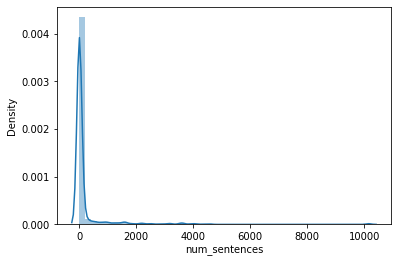

C:\Users\jinji\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


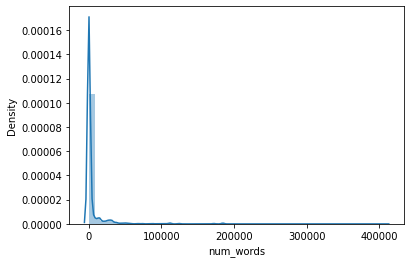

C:\Users\jinji\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


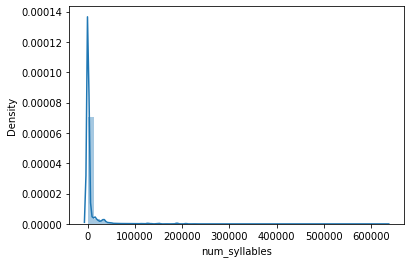

C:\Users\jinji\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


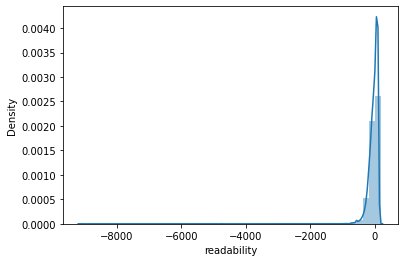

C:\Users\jinji\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


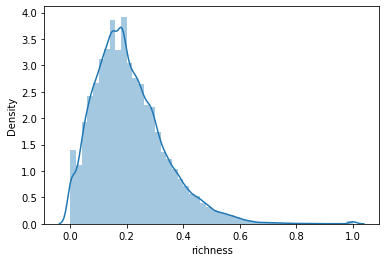

C:\Users\jinji\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


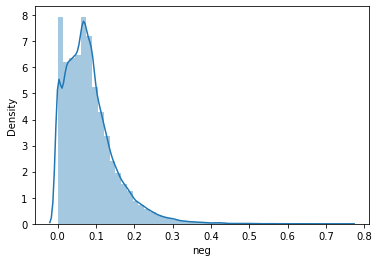

C:\Users\jinji\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


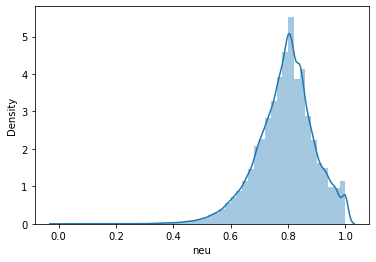

C:\Users\jinji\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


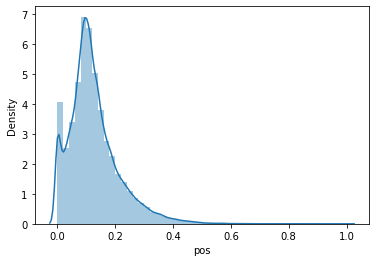

C:\Users\jinji\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


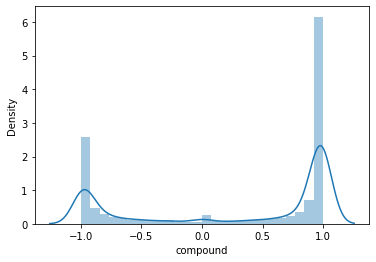

C:\Users\jinji\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


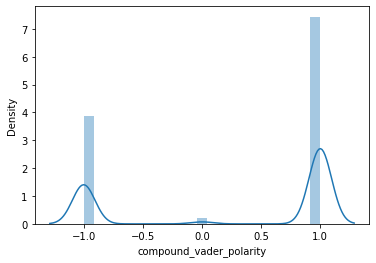

C:\Users\jinji\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


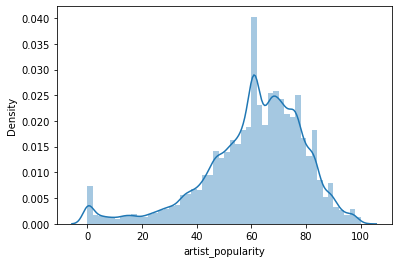

In [92]:
for i in col_feature:
    sns.distplot(df_full[i])
    plt.show()

In [93]:
df_full.Language.value_counts()

en         83074
es          7264
fr           803
pt           698
it           403
de           182
id           116
tl            93
so            92
ja            87
sw            67
tr            57
ca            45
ru            44
ko            41
nl            36
sv            27
pl            25
hi            24
hr            21
he            20
zh-cn         20
af            20
ro            19
vi            17
cy            14
et            14
no            13
da            13
ar            11
fa            11
sk            10
fi             8
cs             4
sl             4
sq             4
el             4
th             3
lv             2
hu             2
bn             2
pa             1
uk             1
unknown        1
Name: Language, dtype: int64

In [94]:
df_full.shape

(93417, 59)

In [95]:
df_full.to_csv('0416_all_feature.csv')

In [96]:
all_feature = pd.read_csv('0416_all_feature.csv')

C:\Users\jinji\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (2,3,4,18,19,22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [97]:
all_feature.shape

(93417, 60)